# 14. plotting with matplotlib

`matplotlib` is a huge package adding graphig capabilities to python. It is not the only such package, but it is the most commonly used in the science and mathematics communities. `matplotlib` can do many things, from quick graphs to full-blown graphical user interface and interactive web apps. We focus on the `pyplot` component commonly used to produce mathematical figures. You load pyplot with 
```
import matplotlib.pyplot as plt
```
Just like it is customary to use `np` as the prefix for `numpy`, most people use `plt` instead of `pyplot`.


`matplotlib` can interact with jupyter notebooks (remember that jupyter is only one way to use python) through the *matplotlib magic* and specific drivers. We won;t go into the details. Just remember to add the command `%matplotlib ipympl` or `%matplotlib widget` at the beginning of your notebook. 

matplotlib has tons of documentation at http://matplotlib.org, and many many online tutorials.


## 14.1 anatomy of a figure
![](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001_2_00x.png)

The first 2 ingredients of any figure are
* `plt.figure`: an empty frame in which we can add plots
* one of several `plt.axes`: location in the figure where we can plot

### Creating a new plot:
The long version is 
```
fig = plt.figure()
ax = plt.axes()
```
then do some plot (see below) and finally close the figure (by default, matplotlib can only manage 20 or so open figures at the same time)
```
plt.close(fig)
```

A more convenient way to create figure and axes is through `plt.subplots`
```
fig, ax = plt.subplots()
```
will create a figure with a single `axes` filling up the figure.
You also can add multiple plots in a single figure.

## 14.2 Adding basic plots to a axe
* `plt.plot`: 2D line plot
* `plt.scatter`: 2D points cloud
* `plt.bar`: 2D bar plot (vertical)
* `plt.barh`: 2D bar plot (horizontal)
* `plt.imshow`: display a 2D array of numbers (or RGB values) as an image
* `plt.quiver`: draw arrows in 2D

All of these have too many options to list. `help(function)` and `?function` are your friends.

In [16]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(0,np.pi,101)
X1 = np.linspace(0,np.pi,21)

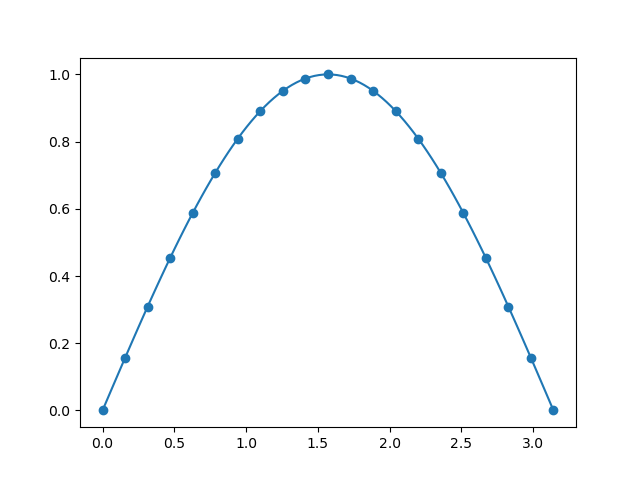

In [17]:
# long version:
fig = plt.figure()
ax = plt.axes()

ax.plot(X,np.sin(X))
ax.scatter(X1, np.sin(X1))

In [18]:
# If we know that we won't add anything to the figure, it is good practice to close it
plt.close(fig)

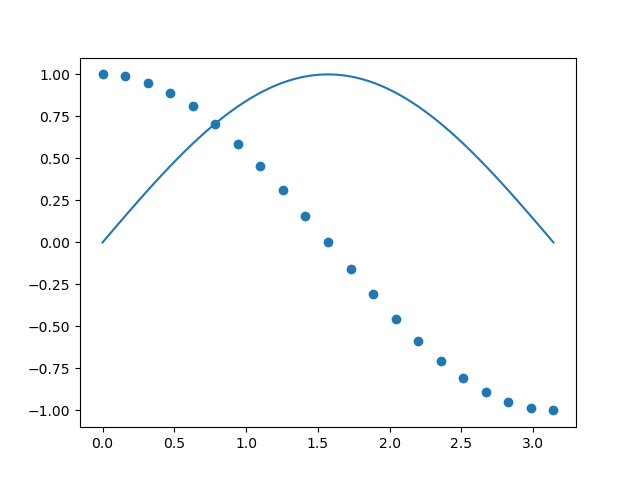

In [19]:
# shorter version
fig, ax = plt.subplots()

ax.plot(X,np.sin(X))
ax.scatter(X1, np.cos(X1))


In [20]:
plt.close(fig)

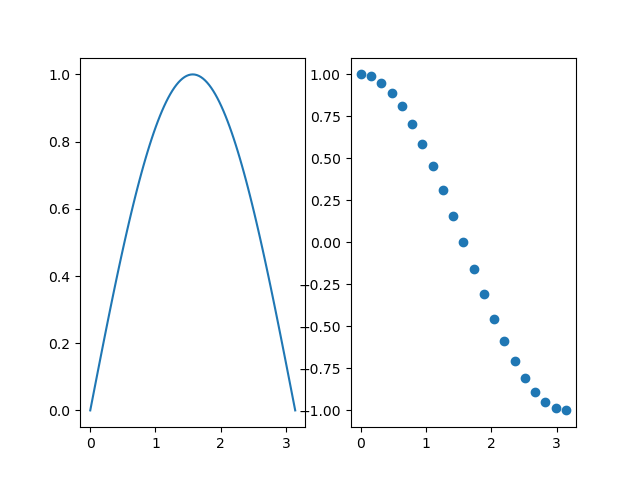

In [21]:
fig, ax = plt.subplots(1, 2)
ax[0].plot(X,np.sin(X))
ax[1].scatter(X1, np.cos(X1))

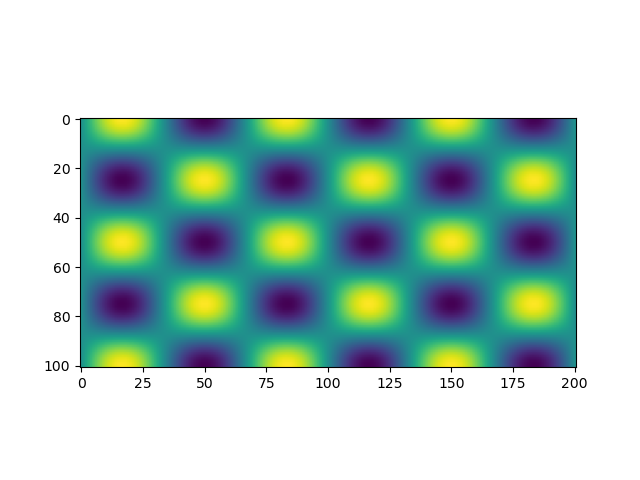

In [22]:
fig, ax = plt.subplots()
nrow = 101
ncol = 201
X = np.linspace(0,2*np.pi, nrow)
Y = np.linspace(0,2*np.pi, ncol)
data2D = np.empty((nrow,ncol))

for i in range(nrow):
    for j in range(ncol):
        data2D[i,j] = np.cos(2*X[i]) * np.sin(3*Y[j])
ax.imshow(data2D)

### Build a figure to illustrate tangent line as the limit of  secant


Text(0, 0.5, 'y')

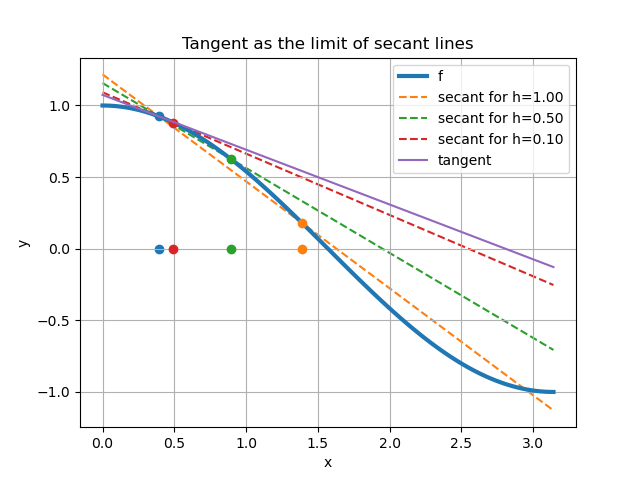

In [27]:
fig, ax = plt.subplots()

# we will start with cos x from 0 to pi
def f(x):
    return np.cos(x)
def fp(x):
    return -np.sin(x)
    
X = np.linspace(0,np.pi, 101) 
ax.plot(X,f(X), linewidth=3,label = 'f')
x0 = np.pi/8
plt.scatter([x0]*2,[0,f(x0)])
for h in [1, 0.5, 0.1]:
    plt.plot(X, f(x0) + (f(x0+h) - f(x0))/h * (X-x0),label = f'secant for h={h:.2f}', linestyle='--',zorder = 0)
    plt.scatter([x0+h]*2, [0,f(x0+h)], marker='o',zorder = 2)
s = ax.plot(X,f(x0) + fp(x0) * (X-x0), label='tangent', linestyle='-')
ax.grid()
ax.legend()
ax.set_title('Tangent as the limit of secant lines')
ax.set_xlabel('x')
ax.set_ylabel('y')


In [24]:
#plt.close(fig)

### illustrate the definite integral being the are below a curve

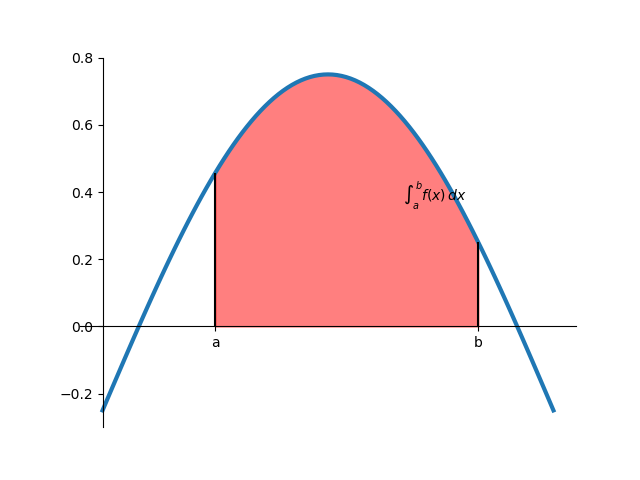

In [30]:
fig, ax = plt.subplots()
def f(x):
    return np.sin(x)-0.25
    
a = np.pi/4
b = 5*np.pi/6
X = np.linspace(0,np.pi, 101) 
ax.plot(X,f(X), linewidth=3,label = 'f')
I = np.linspace(a,b,101)
ax.fill_between(I,f(I),color='red', alpha=.5)
ax.vlines([a,b],[0,0], [f(a),f(b)],color='black')
ax.text(a+b/2, f((a+b)/2)/2,r"$\int_a^b f(x)\, dx$")
ax.spines[['left', 'bottom']].set_position('zero')
ax.spines[['top', 'right']].set_visible(False)
ax.set_xticks([a,b],['a','b'])
ax.set_xticks([a,b],['a','b'])
# ax.grid()

### Rieman sums

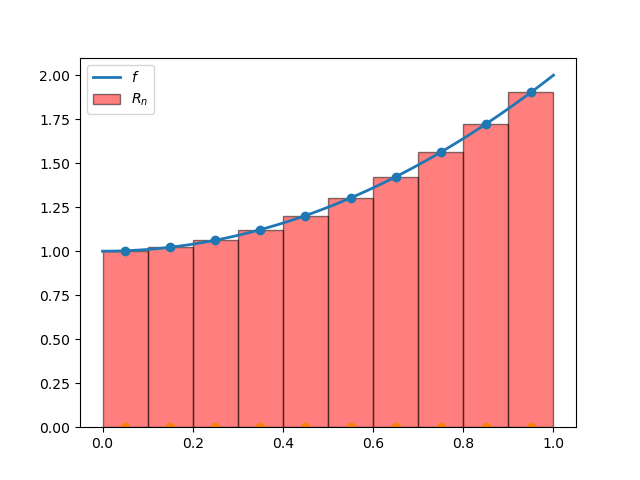

In [26]:
## Rieman summs
def f(x):
    return 1+x**2

fig, ax = plt.subplots()
n = 101
X = np.linspace(0,1,n)
ax.plot(X,f(X),lw=2,label='$f$')

ni = 11
Xi = np.linspace(0,1,ni)
Xis = (Xi[:-1]+Xi[1:])/2
ax.bar(Xi[:-1],f(Xis),width = 1/(ni-1),alpha=0.5,label = '$R_n$', align='edge',edgecolor='k',color='r')
ax.scatter(Xis,f(Xis))
ax.scatter(Xis,np.zeros(np.shape(Xis)))

ax.legend()